#**STUDENTS HABITS VS PERFORMANCE DATASET ANALYSIS**

###**Author :** Benedict Kiprono.

###**Tools used :** python, numpy, pandas, matplotlib, seaborn, os.

---
##**OBJECTIVES :**
* Which students perform better based on the gender?
* Does study hours per day have an effect on student performance in exams?
* Does social media have an effect on student performance in exams?
* Does Netflix have an effect on student performance in exams?
* Does hours of sleep per day have an effect on student performance in exams?
* Does diet quality have an effect on student performance in exams?
* Does frequency of doing exercises have an effect on student performance in exams?
* Does parental education level have an effect on student performance in exams?
* Does internet quality have an effect on student performance in exams?
* Does mental health have an effect on student performance in exams?
* Does age has an effect on mental health rating?

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Installing zip file of the dataset
os.environ['KAGGLE_USERNAME'] = "your_username"
os.environ['KAGGLE_KEY'] = "your_key"

!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
student-habits-vs-academic-performance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/student-habits-vs-academic-performance.zip

Archive:  /content/student-habits-vs-academic-performance.zip
replace student_habits_performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Reading and loading the dataset
student_data = pd.read_csv('/content/student_habits_performance.csv')

In [ ]:
#Printing top five rows for each
student_data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
#Information of the dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
#Check for missing values
student_data.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
#Filling in the missing values
student_data.fillna('Unknown', inplace = True)

In [ ]:
#Check if there are any missing values left
student_data.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
#Statistical analysis
student_data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
#Check for duplicate values
student_data.duplicated().sum()

np.int64(0)

gender
Male      69.368344
Female    69.741372
Other     70.647619
Name: exam_score, dtype: float64


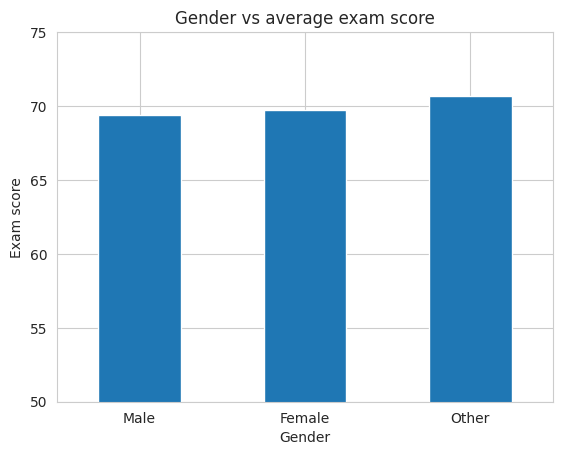

In [ ]:
#Relationship between gender and performance
print(student_data.groupby('gender')['exam_score'].mean().sort_values())
student_data.groupby('gender')['exam_score'].mean().sort_values().plot(kind = 'bar')
plt.ylim(50,75)
plt.title('Gender vs average exam score')
plt.xticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Exam score')
plt.show()

##**Gender vs performance**
* Students of the "other" gender performed the best with an average of 70.6%.
* Female students performed slightly better than males with an average of 69.7%.
* Male students performed poorly with an average of 69.3%.


gender
Male      3.510692
Female    3.583784
Other     3.611905
Name: study_hours_per_day, dtype: float64


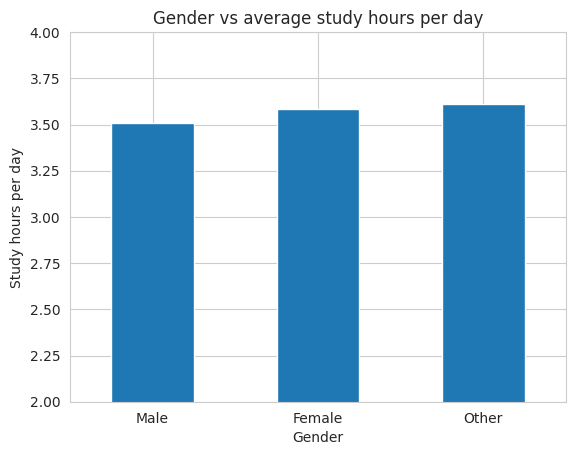

In [ ]:
#Gender vs study hours per day
print(student_data.groupby('gender')['study_hours_per_day'].mean().sort_values())
student_data.groupby('gender')['study_hours_per_day'].mean().sort_values().plot(kind = 'bar')
plt.ylim(2.0, 4.0)
plt.title('Gender vs average study hours per day')
plt.xticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Study hours per day')
plt.show()

##**Why do students of the other gender perform the best averagely while the male students perform the worst averagely?**
* Students of the "other" gender recorded the highest study hours per day with an average of 3.61 hours.
* Male students recorded the lowest study hours per day with an average of 3.51 hours.

age
17    70.342857
18    70.939316
19    68.293805
20    69.919863
21    67.544000
22    69.102655
23    70.901681
24    69.638806
Name: exam_score, dtype: float64


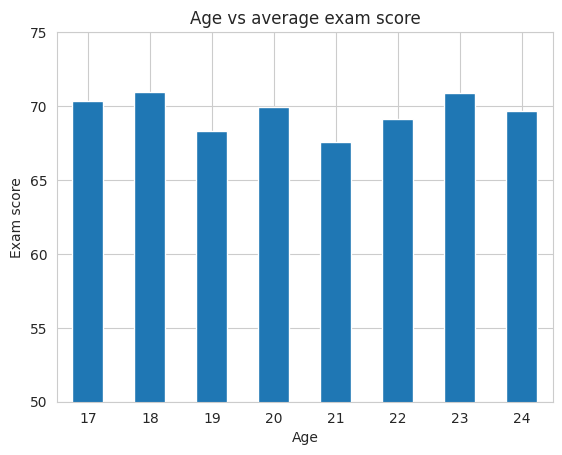

In [ ]:
#Relationship between age and exam score
print(student_data.groupby('age')['exam_score'].mean().sort_index())
student_data.groupby('age')['exam_score'].mean().sort_index().plot(kind = 'bar')
plt.ylim(50,75)
plt.title('Age vs average exam score')
plt.xticks(rotation = 0)
plt.xlabel('Age')
plt.ylabel('Exam score')
plt.show()

The correlation between study hours and exam score is : , 0.83
The total number of students who scored 100% is :  48


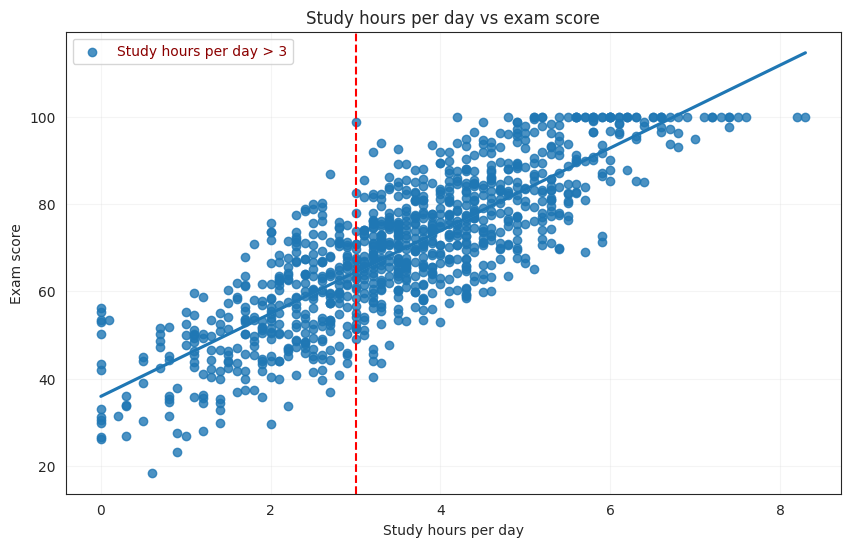

In [ ]:
#Correlation between study hours per day and exam score
print(f"The correlation between study hours and exam score is : , {student_data['study_hours_per_day'].corr(student_data['exam_score']):.2f}")

#Finding total number of students who scored 100%
print('The total number of students who scored 100% is : ', len(student_data[student_data['exam_score'] == 100]))

plt.figure(figsize = (10,6))
sns.set_style('white')

sns.regplot(x = student_data['study_hours_per_day'], y = student_data['exam_score'], ci = 0)
plt.axvline(x = 3, color = 'red', linestyle = '--')
plt.legend(['Study hours per day > 3'], labelcolor = 'darkred', loc = 'upper left')
plt.grid(alpha = 0.2)
plt.title('Study hours per day vs exam score')
plt.xlabel('Study hours per day')
plt.ylabel('Exam score')
plt.show()

##**Effect of study hours per day on student performance in exams**
* Students who studied for at least 3 hours per day recorded a 82% chance of scoring over 70% in their exams.

The correlation between social media hours and exam score is : , -0.17


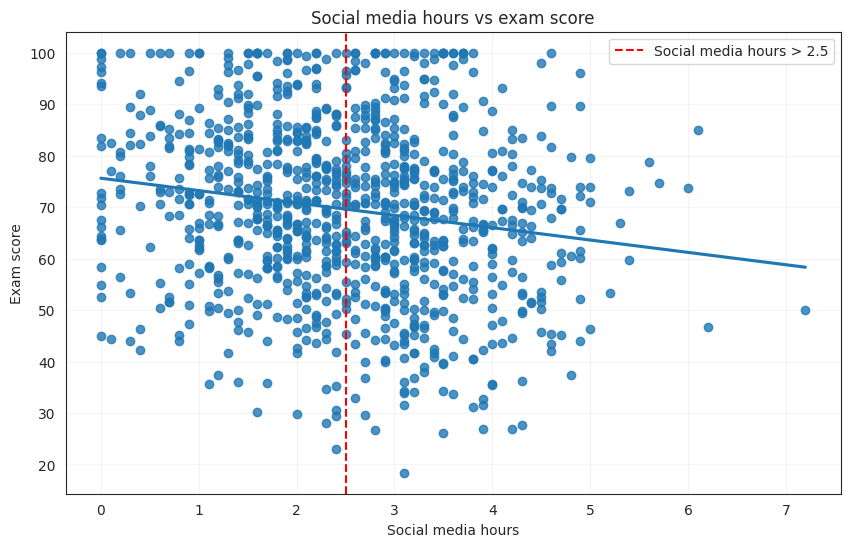

In [ ]:
#Correlation between social media hours and exam score
print(f"The correlation between social media hours and exam score is : , {student_data['social_media_hours'].corr(student_data['exam_score']):.2f}")
plt.figure(figsize = (10,6))
sns.regplot(x = student_data['social_media_hours'], y = student_data['exam_score'], ci = 0)
plt.axvline(x = 2.5, color = 'red', linestyle = '--', label = 'Social media hours > 2.5')
plt.legend(loc = 'upper right')
plt.grid(alpha = 0.2)
plt.title('Social media hours vs exam score')
plt.xlabel('Social media hours')
plt.ylabel('Exam score')
plt.show()

##**Effect of spending hours on social media on student performance in exams**
* Students who spent less than 2.5 hours on social media recorded a 83% chance of scoring over 70% in their exams.

Correlation between netflix hours and exam score is : , -0.17


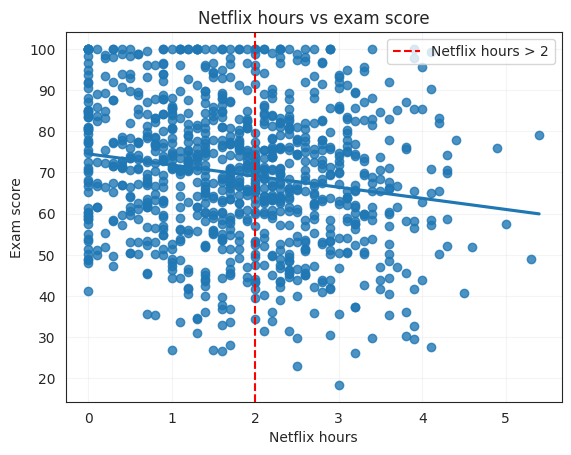

In [ ]:
#Correlation between netflix_hours and exam score
print(f"Correlation between netflix hours and exam score is : , {student_data['netflix_hours'].corr(student_data['exam_score']):.2f}")

sns.regplot(data = student_data, x = 'netflix_hours', y = 'exam_score', ci = 0)
plt.axvline(x = 2, color = 'red', linestyle = '--', label = 'Netflix hours > 2')
plt.legend(loc = 'upper right')
plt.grid(alpha = 0.2)
plt.title('Netflix hours vs exam score')
plt.xlabel('Netflix hours')
plt.ylabel('Exam score')
plt.show()

##**Effect of spending hours on netflix on student performance in exams**
* Students who spent less than 2 hours on netflix recorded a 83% chance of scoring over 70% in their exams.

Correlation between attendance percentage and exam score is : , 0.09


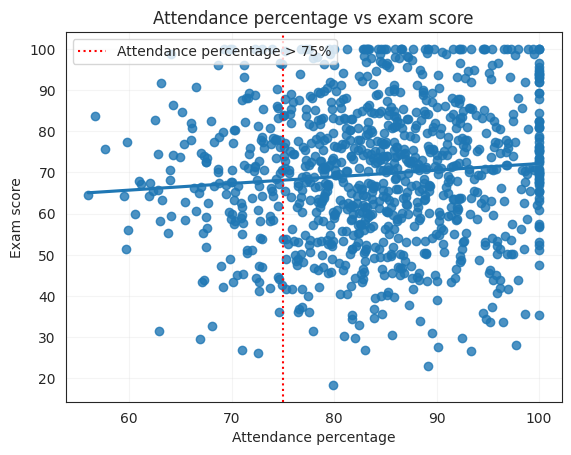

In [ ]:
#Correlation between attendance percentage and exam score
print(f"Correlation between attendance percentage and exam score is : , {student_data['attendance_percentage'].corr(student_data['exam_score']):.2f}")

sns.regplot(data = student_data, x = 'attendance_percentage', y = 'exam_score', ci = 0)
plt.axvline(x = 75, color = 'red', linestyle = ':', label = 'Attendance percentage > 75%')
plt.legend(loc = 'upper left')
plt.grid(alpha = 0.2)
plt.title('Attendance percentage vs exam score')
plt.xlabel('Attendance percentage')
plt.ylabel('Exam score')
plt.show()

##**Effect of class attendance percentage on student performance in exams**
*

Correlation between sleep hours and exam score is : , 0.12


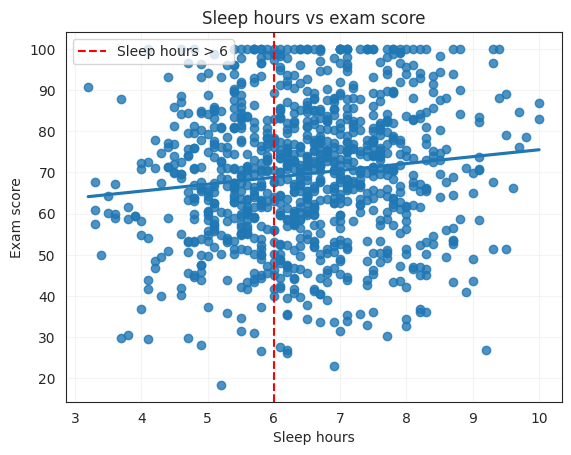

In [ ]:
#Correlation between sleep hours and exam score
print(f"Correlation between sleep hours and exam score is : , {student_data['sleep_hours'].corr(student_data['exam_score']):.2f}")

sns.regplot(data = student_data, x = 'sleep_hours', y = 'exam_score', ci = 0)
plt.axvline(x = 6, color = 'red', linestyle = '--', label = 'Sleep hours > 6')
plt.legend(loc = 'upper left')
plt.grid(alpha = 0.2)
plt.title('Sleep hours vs exam score')
plt.xlabel('Sleep hours')
plt.ylabel('Exam score')
plt.show()

##**Effect of sleep hours on student performance in exams**
* Students who slept for at least 6 hours per day recorded a 12% chance to score over 70% in exams than those who slept for less than 6 hours.

diet_quality
Poor    68.127568
Good    69.366402
Fair    70.428833
Name: exam_score, dtype: float64


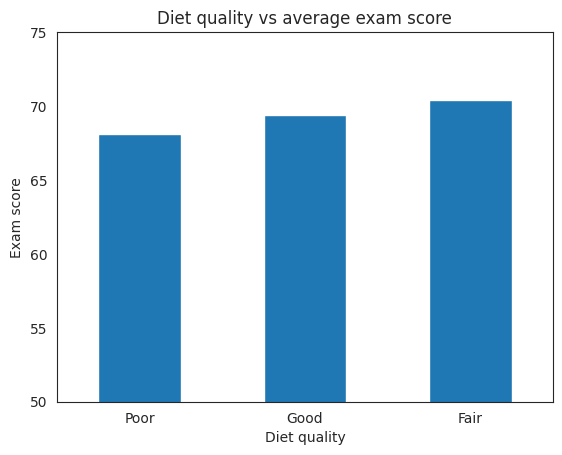

In [ ]:
#Relationship between diet quality and exam score
print(student_data.groupby('diet_quality')['exam_score'].mean().sort_values())
student_data.groupby('diet_quality')['exam_score'].mean().sort_values().plot(kind = 'bar')
plt.ylim(50,75)
plt.title('Diet quality vs average exam score')
plt.xticks(rotation = 0)
plt.xlabel('Diet quality')
plt.ylabel('Exam score')
plt.show()

##**Effect of diet quality on student performance in exams**
* Students who consumed fair quality foods performed the best with an average of 70.4%.
* Students who consumed poor quality foods performed the worst with an average score of 68.1%.

Correlation between exercise frequency and exam score is : ', 0.16


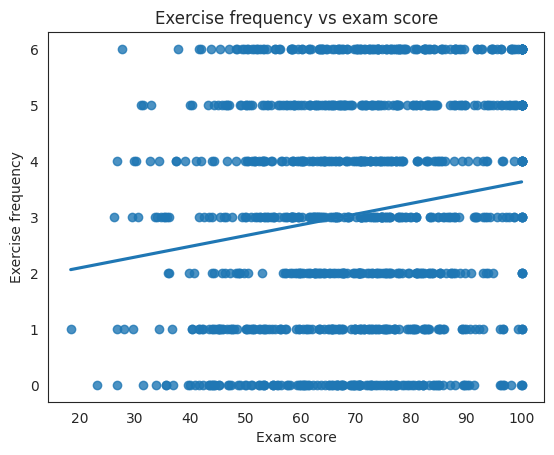

In [ ]:
#Correlation between exercise frequency and exam score
print(f"Correlation between exercise frequency and exam score is : ', {student_data['exam_score'].corr(student_data['exercise_frequency']):.2f}")

sns.regplot(data = student_data, x = 'exam_score' , y = 'exercise_frequency', ci = 0)
plt.title('Exercise frequency vs exam score')
plt.xlabel('Exam score')
plt.ylabel('Exercise frequency')
plt.show()

##**Effect of exercise frequency on student performance in exams**
* Students who exercise for at least 3 times per week recorded 16% better overall performances  than students who exercised less than 3 times a week.

parental_education_level
Master         68.086826
High School    69.547194
Unknown        70.034066
Bachelor       70.272571
Name: exam_score, dtype: float64


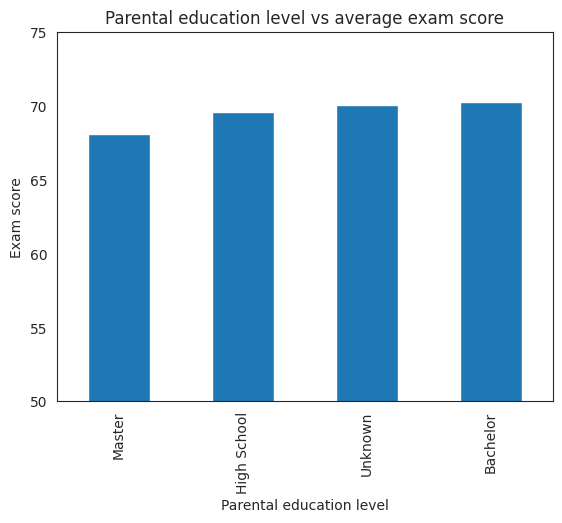

In [ ]:
#Relationship between parental education level and exam score
parental_education_level = student_data.groupby('parental_education_level')['exam_score'].mean().sort_values()
print(parental_education_level)
parental_education_level.plot(kind = 'bar')
plt.ylim(50,75)
plt.title('Parental education level vs average exam score')
plt.xlabel('Parental education level')
plt.ylabel('Exam score')
plt.show()

##**Parental education level vs student's average exam performance**
* Students whose parents possess a bachelor's degree performed the best with an average of 70.2% in their exams.
* Students whose parents posess a master's degree performed the worst with a average of 68.0% in their exams.

internet_quality
Good       68.647651
Poor       69.717284
Average    70.643990
Name: exam_score, dtype: float64


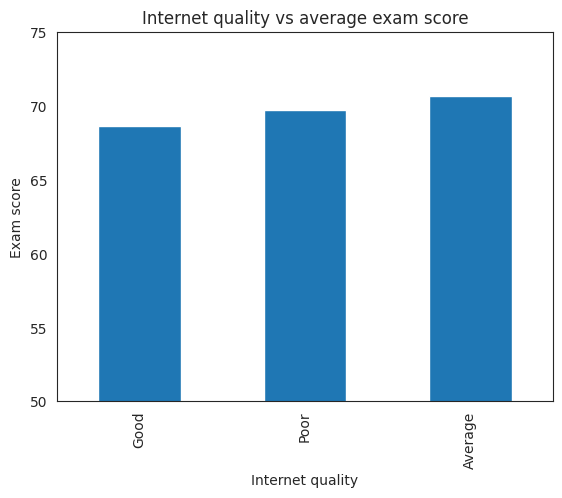

In [ ]:
#Relationship between internet quality & exam score
internet_quality = student_data.groupby('internet_quality')['exam_score'].mean().sort_values()
print(internet_quality)

internet_quality.plot(kind = 'bar')
plt.ylim(50,75)
plt.title('Internet quality vs average exam score')
plt.xlabel('Internet quality')
plt.ylabel('Exam score')
plt.show()

##**Effect of internet quality on student performance in exams**
* Students with an access to internet of average quality perform the best with an average of 70.6% in their exams.
* Students with an access to internet of good quality perform the worst with an average of 68.6% in their exams.

Correlation between mental health rating and exam score is : , 0.32


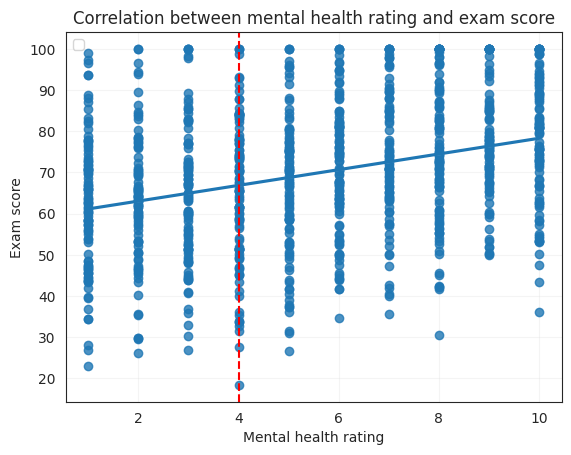

In [ ]:
#Correlation between mental health rating and exam score
print(f"Correlation between mental health rating and exam score is : , {student_data['mental_health_rating'].corr(student_data['exam_score']):.2f}")

sns.regplot(data = student_data, x = 'mental_health_rating', y = 'exam_score', ci = 0)
plt.axvline(x = 4.0, color = 'red', linestyle = '--')
plt.legend(loc = 'upper left')
plt.grid(alpha = 0.2)
plt.title('Correlation between mental health rating and exam score')
plt.xlabel('Mental health rating')
plt.ylabel('Exam score')
plt.show()

##**Effect of mental health on student performance in exams.**
* Students with a mental health rating of more than 4 perform 32% better than students with 4 or less than 4.

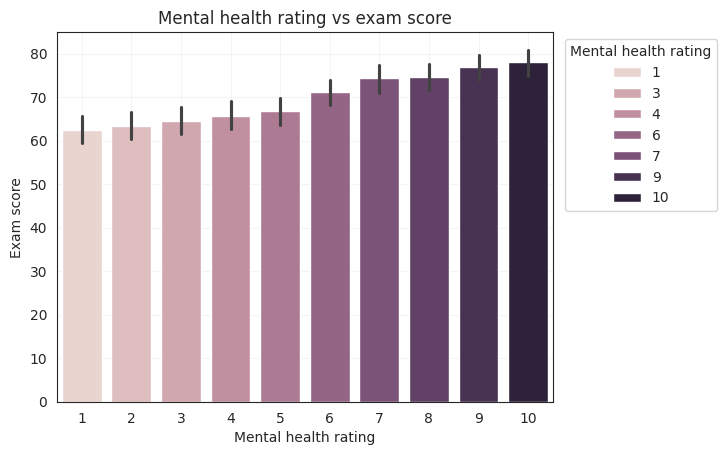

In [ ]:
#Mental health rating vs exam score
sns.barplot(data = student_data, x = 'mental_health_rating', y = 'exam_score', hue = 'mental_health_rating')
sns.set_style('whitegrid')
plt.title('Mental health rating vs exam score')
plt.legend(bbox_to_anchor = (1.01, 1), title = 'Mental health rating')
plt.grid(alpha = 0.2)
plt.xlabel('Mental health rating')
plt.ylabel('Exam score')
plt.show()


##**Mental health rating vs student's exam performance**
* All students who had a mental health rating of at least 6 scored over 70% in their exams.

extracurricular_participation
No     69.591349
Yes    69.623270
Name: exam_score, dtype: float64


Text(0.5, 1.0, 'Extra-curricular participation vs exam score')

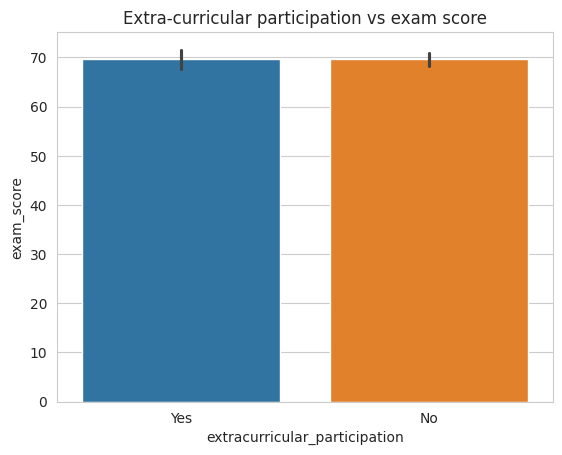

In [ ]:
#Extra-curricular participation vs exam score
print(student_data.groupby('extracurricular_participation')['exam_score'].mean().sort_values())
sns.barplot(data = student_data, x = 'extracurricular_participation', y = 'exam_score', hue = 'extracurricular_participation')
plt.title('Extra-curricular participation vs exam score')

Text(0.5, 1.0, 'Internet quality vs netflix hours')

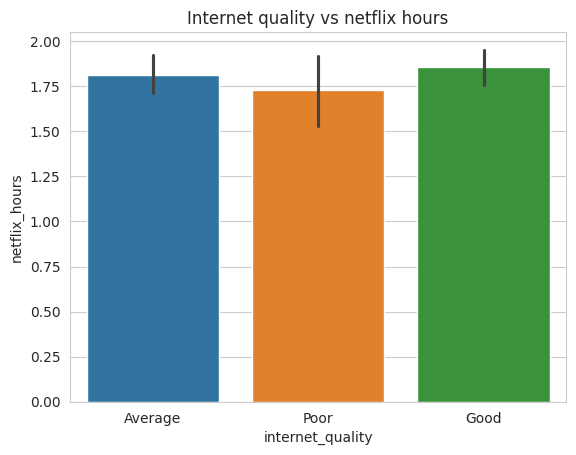

In [ ]:
#Internet quality vs netlix hours
sns.barplot(data = student_data, x = 'internet_quality', y = 'netflix_hours', hue = 'internet_quality')
plt.title('Internet quality vs netflix hours')

Text(0.5, 1.0, 'Internet quality vs social media hours')

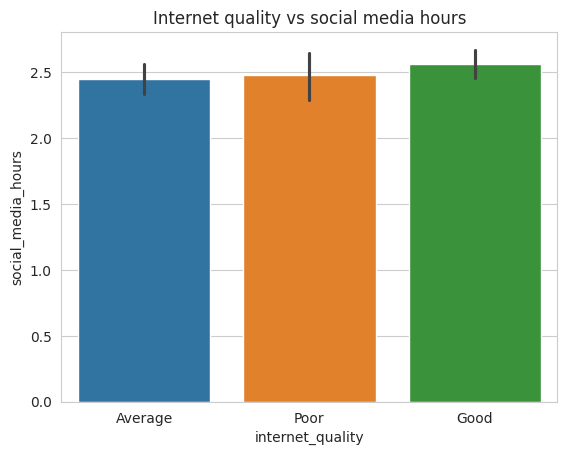

In [ ]:
#Internet quality vs social media hours
sns.barplot(data = student_data, x = 'internet_quality', y = 'social_media_hours', hue = 'internet_quality')
plt.title('Internet quality vs social media hours')

##**Why do students with an access to internet of good quality perform the worst averagely in their exams?**
* Students with an access to internet of good quality record the highest number of hours spent on both netflix and social media on average.

Text(0.5, 1.0, 'Age vs mental health rating')

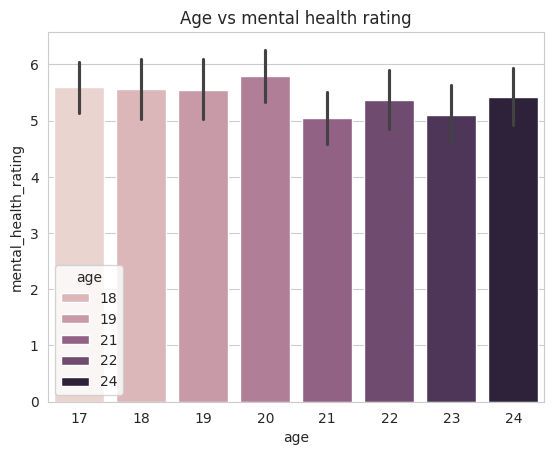

In [ ]:
#Age vs mental health ratibg
sns.barplot(data = student_data, x = 'age', y = 'mental_health_rating', hue = 'age')
plt.title('Age vs mental health rating')

##**Age vs mental health rating**
* Students who are aged less than 20 record relatively higher mental health ratings than those aged more than 20 years.

Text(0.5, 1.0, 'Mental health rating vs gender')

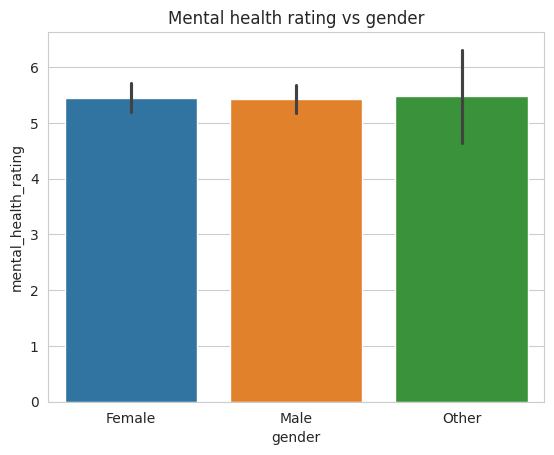

In [ ]:
#Mental health rating vs gender
sns.barplot(data = student_data, x = 'gender', y = 'mental_health_rating', hue = 'gender')
plt.title('Mental health rating vs gender')

In [ ]:
student_data.to_csv('cleaned_student_data.csv', index = False)

#**FINDINGS FROM THE DATA**
##**Gender vs performance**
* Students of the "other" gender performed the best with an average of 70.6%.
* Female students performed slightly better than males with an average of 69.7%.
* Male students performed poorly with an average of 69.3%.
####**Why do students of the other gender perform the best averagely while the male students perform the worst averagely?**
* Students of the "other" gender recorded the highest study hours per day with an average of 3.61 hours.
* Male students recorded the lowest study hours per day with an average of 3.51 hours.

##**Effect of study hours per day on student performance in exams**
* Students who studied for at least 3 hours per day recorded a 82% chance of scoring over 70% in their exams.

##**Effect of social media on student performance in exams**
* Students who spent less than 2.5 hours on social media recorded a 83% chance of scoring over 70% in their exams.

##**Effect of netflix on student performance in exams**
* Students who spent less than 2 hours on netflix recorded a 83% chance of scoring over 70% in their exams.

##**Effect of sleep hours on student performance in exams**
* Students who slept for at least 6 hours per day recorded a 12% chance to score over 70% in exams than those who slept for less than 6 hours.

##**Effect of diet quality on student performance in exams**
* Students who consumed fair quality foods performed the best with an average of 70.4%.
* Students who consumed poor quality foods performed the worst with an average score of 68.1%.

##**Effect of exercise frequency on student performance in exams**
* Students who exercise for at least 3 times per week recorded 16% better overall performances  than students who exercised less than 3 times a week.

##**Parental education level vs student's average exam performance**
* Students whose parents possess a bachelor's degree performed the best with an average of 70.2% in their exams.
* Students whose parents posess a master's degree performed the worst with a average of 68.0% in their exams.

##**Effect of internet quality on student performance in exams**
* Students with an access to internet of average quality perform the best with an average of 70.6% in their exams.
* Students with an access to internet of good quality perform the worst with an average of 68.6% in their exams.
####**Why do students with an access to internet of good quality perform the worst averagely in their exams?**
* Students with an access to internet of good quality record the highest number of hours spent on both netflix and social media on average.

##**Effect of mental health on student performance in exams.**
* Students with a mental health rating of more than 4 perform 32% better than students with 4 or less than 4.

##**Mental health rating vs student's exam performance**
* All students who had a mental health rating of at least 6 scored over 70% in their exams.

##**Does the age have an effect on mental health rating ?**
* Students who are aged less than 20 record relatively higher mental health ratings than those aged more than 20 years.

#**RECOMMENDATIONS**
* Students should study for at least 4 hours daily.
* Students should have enough sleep of at least 6 hours daily.
* Students should spend less than 2 hours on netflix per day.
* Students should spend less than 2.5 hours on social media per day.
* Students should be provided with foods of fair quality.
* Students should exercise at least 3 times per week.
* Students aged above 20 years should seek help from mental health counselors who will help them manage their mental health.